# Pulse level circuit simulation
## Processor
It first compiles circuit into a Hamiltonian model, adds noisy dynamics and then uses the QuTiP open time evolution solvers to simulation the evolution.

In [75]:
import numpy as np
from qutip import sigmaz
from qutip.states import basis
from qutip.qip.circuit import QubitCircuit
from qutip.qip.device import Processor
from qutip.qip.pulse import Pulse

In [76]:
import matplotlib.pyplot as plt

# How to use Processor class
---
### 1. Define a control Hamiltonian
 
 ### 2. Specify coeffciant and tlist
 

In [77]:
from scipy.signal.windows import dpss
from scipy.interpolate import interp1d

In [78]:
num_qubits = 2
Fs = 2
N = 100
# time window N*(1/Fs)
time = np.arange(N+1)/Fs 
NW = 6    # Time-halfbandwidth product
# Generating the Slepian sequences
slepian_sequence = dpss(N+1, NW)
slepian_continuous = interp1d(time, slepian_sequence, kind='cubic') # IT IS FUNCTION

In [79]:
slepian_sequence = dpss(N+1, NW) #len(
len(slepian_sequence)

101

(<Figure size 1200x600 with 1 Axes>, [<Axes: >])

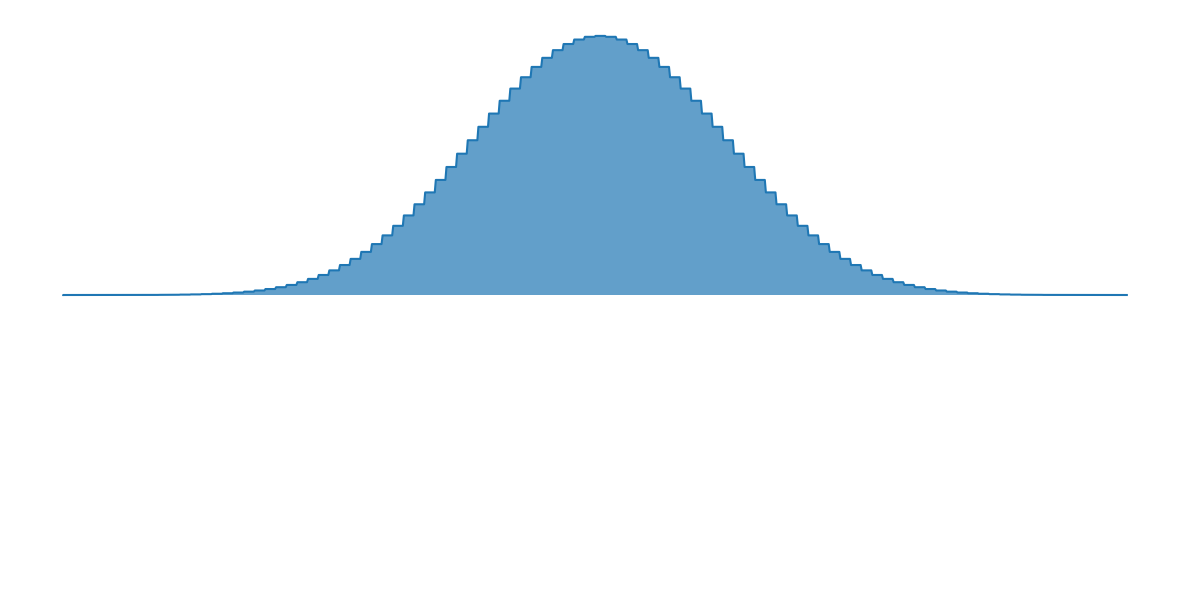

In [89]:
# DEFINING PULSE METHOD 1
processor = Processor(N=2, spline_kind="step_func")
tlist = np.arange(N+1)/Fs 
coeff = slepian_sequence
pulse= Pulse(sigmaz(),targets=0, coeff=coeff, tlist=tlist)
processor.add_pulse(pulse)
processor.plot_pulses()


(<Figure size 1200x600 with 1 Axes>, [<Axes: >])

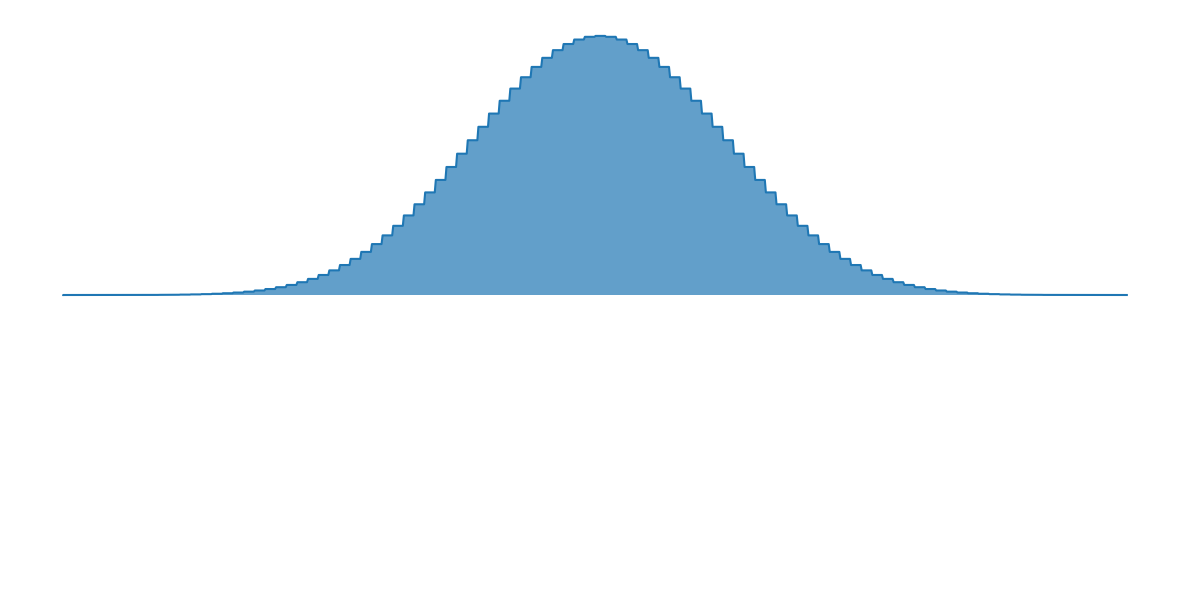

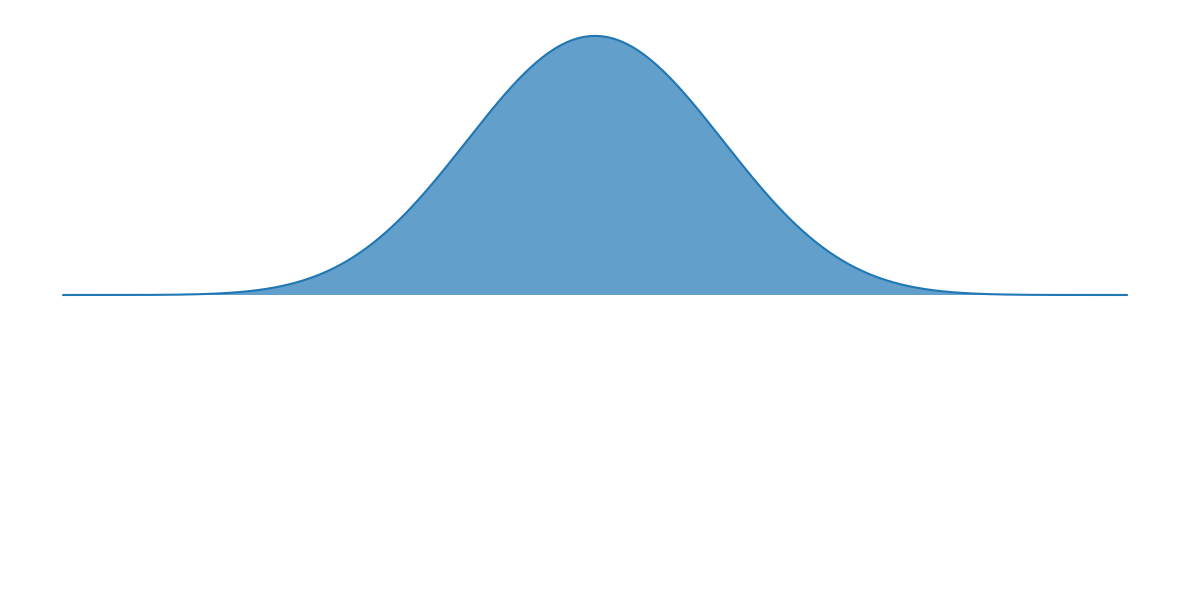

In [73]:
# DEFINING PULSE METHOD 2
# Step function setup
tlist = np.arange(N+1)/Fs 
processor = Processor(N=2, spline_kind="step_func")
processor.add_control(sigmaz(), targets=0)
processor.pulses[0].tlist = tlist
processor.pulses[0].coeff = slepian_sequence
processor.plot_pulses()
# Continuous function setup
tlist = np.arange(N+1)/Fs 
processor = Processor(N=2, spline_kind="cubic")
processor.add_control(sigmaz(), 0)
processor.pulses[0].tlist = tlist
processor.pulses[0].coeff = slepian_sequence
processor.plot_pulses()

In [10]:
circuit = QubitCircuit(num_qubits)
circuit.add_gate("X", targets=1)
circuit.add_gate("X", targets=0)
circuit

In [ ]:
processor.load_circuit()